# **Third homework**

In [4]:
import cv2
import numpy as np
import time
from matplotlib import pyplot as plt
import time
import dlib

This function help us to show the images as quick as is't possible and of cousre easier.

You can import more images in **list** type and with **subplot entry** to make a gallery of your content, too.

The default size of output images is 5, and the axis's lables are off.

As it's shown in func, at first I extract the size of image's scale. In this part we have to be sure that every pictures (if we have multiple image) have the same size. The other part there is no important isues to be care; The another thing is we have to convert the color from BGR to RGB for have a correct image.

In [3]:
def imshow(title= [""], image= None, size= 5, axixEn= False, subplot= [1, 1]):
    if (subplot[0] > 1) | (subplot[1] > 1):
      w, h = image[0].shape[0], image[0].shape[1]
      aspect_ratio = w/h
      fig, axes = plt.subplots(subplot[0], subplot[1], figsize= (size * aspect_ratio,size))
      for i, ax in enumerate(axes.flatten()):
          ax.imshow(cv2.cvtColor(image[i], cv2.COLOR_BGR2RGB))
          ax.set_title(title[i])
          ax.tick_params(left= False, labelleft= False , labelbottom= False, bottom= False)
      plt.tight_layout()
    
    else:
      w, h = image.shape[0], image.shape[1]
      aspect_ratio = w/h
      plt.figure(figsize= (size * aspect_ratio,size)) 
      plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
      plt.title(title)
      if axixEn == False:
        plt.tick_params(left= False, labelleft= False , labelbottom= False, bottom= False)
      plt.show()

## Question 1


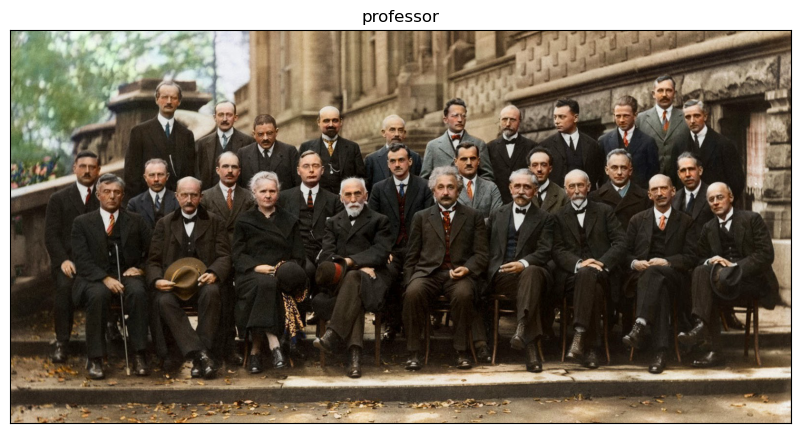

In [3]:
img = cv2.imread('faces.jpg')

imshow('professor', img, size= 20)

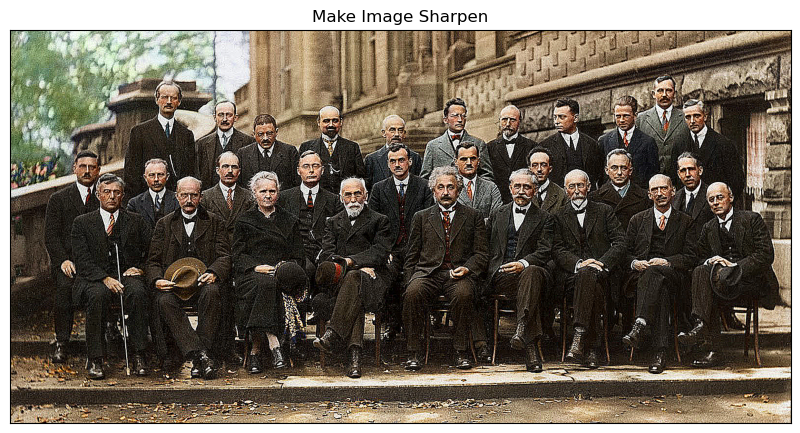

In [7]:
sharpenKernel = np.array([[-1, -1, -1], 
                          [-1, 9, -1],
                          [-1, -1, -1]])
sharpenImg = cv2.filter2D(img, -1, sharpenKernel)

imshow('Make Image Sharpen', sharpenImg, size= 20)

In [8]:
grayImg = cv2.cvtColor(sharpenImg, cv2.COLOR_BGR2GRAY)

In [9]:
faces = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')
faces = faces.detectMultiScale(grayImg, scaleFactor= 1.007, minNeighbors= 4, minSize= (40, 40))

print("Number of faces detected:", len(faces))

Number of faces detected: 29


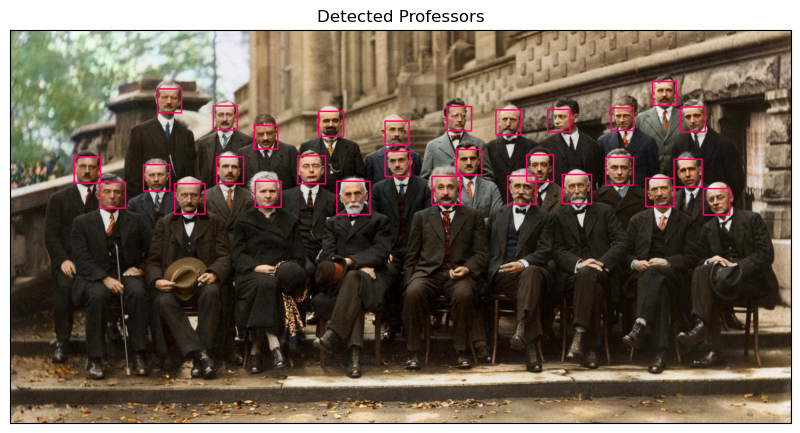

In [14]:
imgCopy = img.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(imgCopy, (x, y), (x+w, y+h), (100, 0, 255), 2)

imshow('Detected Professors', imgCopy, size= 20)

In [16]:
face = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt2.xml')

cap = cv2.VideoCapture(0)
cap.set(3,1920)
cap.set(4,1080)

cv2.startWindowThread()

fourcc = cv2.VideoWriter_fourcc(*'DIVX')
out = cv2.VideoWriter('mewoFace.mp4', -1, fourcc, 20.0, (1920, 1080))

[ WARN:0@1514.176] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_d9lyif19nl/croot/opencv-suite_1676472756314/work/modules/videoio/src/cap_gstreamer.cpp (862) isPipelinePlaying OpenCV | GStreamer warning: GStreamer: pipeline have not been created


In [17]:
# Start the FPS timer
start_time = time.time()
FPS = 0
frame_count = 0

while True:
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    if not ret:
        break

    grayImg = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face.detectMultiScale(grayImg, scaleFactor= 1.1, minNeighbors= 5)

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (70, 0, 175), 10)

    frame = cv2.resize(frame, (1080, 720))  

    # Update the FPS counter
    frame_count += 1
    if frame_count % 2 == 0:
        end_time = time.time()
        FPS = int(2 / (end_time - start_time))
        start_time = end_time

    frame = cv2.putText(frame, str(FPS), (10, 10), cv2.FONT_HERSHEY_SIMPLEX, 3, (0, 0, 0), 10)

    cv2.imshow('frame', frame)
    out.write(frame)

    # Exit the loop if 'q' is pressed
    if cv2.waitKey(1) == ord('q'):
        break

# Release the resources
cap.release()
out.release()
cv2.destroyAllWindows()

# Print the FPS
print("Maximum FPS:", FPS)

: 

: 

## Question 2

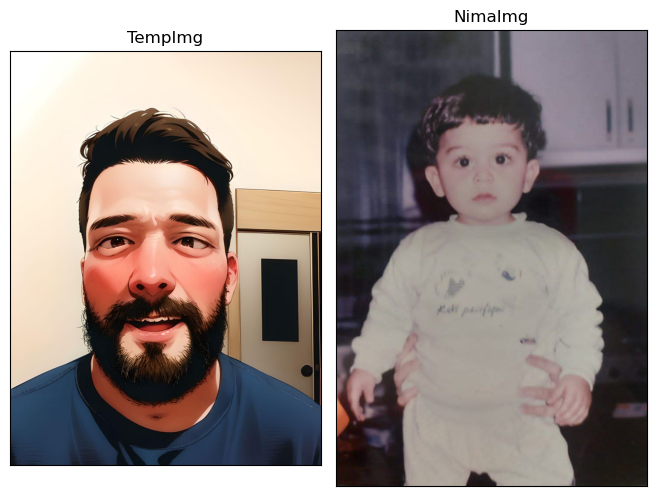

In [5]:
imgReza = cv2.imread('reza.jpg')
imgNima = cv2.imread('nimak.jpg')

imshow(['TempImg', 'NimaImg'], [imgReza, imgNima], size= 5, subplot= [1, 2])

In [113]:
grayImgReza = cv2.cvtColor(imgReza, cv2.COLOR_BGR2GRAY)
grayImgNima = cv2.cvtColor(imgNima, cv2.COLOR_BGR2GRAY)

imgReza_n = np.array(imgReza)
imgNima_n = np.array(imgNima)

h, w, c = imgNima.shape
imgNimaFace = np.zeros((h, w, c), np.uint8)

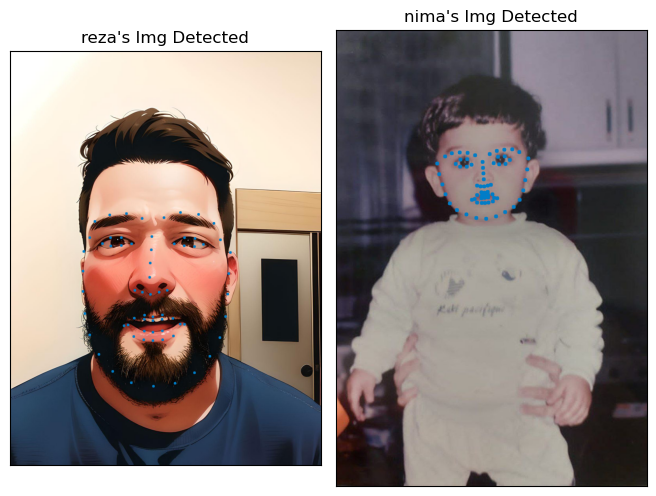

In [114]:
imgRezaCopy = imgReza.copy()
imgNimaCopy = imgNima.copy()

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

faceReza = detector(grayImgReza)
faceNima = detector(grayImgNima)
landmarks_list = []

for face1, face2 in zip(faceReza, faceNima):
    landmarksReza = predictor(grayImgReza, face1)
    landmarksNima = predictor(grayImgNima, face2)

    landmarks_arrReza = np.array([[p.x, p.y] for p in landmarksReza.parts()])
    landmarks_arrNima = np.array([[p.x, p.y] for p in landmarksNima.parts()])

    landmarks_list.append(landmarks_arrReza)
    landmarks_list.append(landmarks_arrNima)

    facePointReza = []
    for landmark in landmarksReza.parts():
        cv2.circle(imgRezaCopy, (landmark.x, landmark.y), 5, (200, 125, 0), -1)
        facePointReza.append((landmark.x, landmark.y))

    facePointNima = []
    for landmark in landmarksNima.parts():
        cv2.circle(imgNimaCopy, (landmark.x, landmark.y), 5, (200, 125, 0), -1)
        facePointNima.append((landmark.x, landmark.y))

imshow(['reza\'s Img Detected', 'nima\'s Img Detected'], [imgRezaCopy, imgNimaCopy], size= 5, subplot= [1, 2])

In [115]:
maskImgReza = np.zeros_like(grayImgReza)
maskImgNima = np.zeros_like(grayImgNima)

facePointReza_n = np.array(facePointReza, np.int32)
facePointNima_n = np.array(facePointNima, np.int32)

convexHullImgReza = cv2.convexHull(facePointReza_n)
convexHullImgNima = cv2.convexHull(facePointNima_n)

In [116]:
boundImgReza = cv2.boundingRect(convexHullImgReza)

divide_2d = cv2.Subdiv2D(boundImgReza)
divide_2d.insert(facePointReza)
split_triangle = divide_2d.getTriangleList()
split_triangle = np.array(split_triangle, dtype= np.int32)

cv2.fillConvexPoly(maskImgReza, convexHullImgReza, 255)
faceImgReza = cv2.bitwise_and(imgReza, imgReza, mask= maskImgReza)

In [117]:
def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

Extract the points of whole three points to make triangle convex

In [118]:
trianglePoints = []
for edge in split_triangle:
    firstPoint = (edge[0], edge[1])
    firstPoint = np.array(firstPoint)
    secondPoint = (edge[2], edge[3])
    secondPoint = np.array(secondPoint)
    thirdPoint = (edge[4], edge[5])
    thirdPoint = np.array(thirdPoint)

    index_edge1 = np.where((facePointReza_n == firstPoint).all(axis= 1))
    index_edge1 = extract_index_nparray(index_edge1)

    index_edge2 = np.where((facePointReza_n == secondPoint).all(axis= 1))
    index_edge2 = extract_index_nparray(index_edge2)

    index_edge3 = np.where((facePointReza_n == thirdPoint).all(axis= 1))
    index_edge3 = extract_index_nparray(index_edge3)


    if index_edge1 is not None and index_edge2 is not None and index_edge3 is not None:
        triangle = [index_edge1, index_edge2, index_edge3]
        trianglePoints.append(triangle)

Joining the landmarks and make the convex of them

In [119]:
for triangle in trianglePoints:
    firstPointR = facePointReza[triangle[0]]
    secondPointR = facePointReza[triangle[1]]
    thirdPointR = facePointReza[triangle[2]]

    firstPointN = facePointNima[triangle[0]]
    secondPointN = facePointNima[triangle[1]]
    thirdPointN = facePointNima[triangle[2]]

    triangleR = np.array([firstPointR, secondPointR, thirdPointR], np.int32)
    triangleN = np.array([firstPointN, secondPointN, thirdPointN], np.int32)

    rectFaceReza = cv2.boundingRect(triangleR)
    (x, y, w, h) = rectFaceReza
    croppedReza = imgReza[y: y + h, x: x + w]
    croppedMaskReza = np.zeros((h, w), np.uint8)

    facePointsReza = np.array([[firstPointR[0] - x, firstPointR[1] - y],
                               [secondPointR[0] - x, secondPointR[1] - y],
                               [thirdPointR[0] - x, thirdPointR[1] - y]], np.int32)

    cv2.fillConvexPoly(croppedMaskReza, facePointsReza, 255)

    cv2.line(maskImgReza, firstPointR, secondPointR, 255)
    cv2.line(maskImgReza, secondPointR, thirdPointR, 255)
    cv2.line(maskImgReza, thirdPointR, firstPointR, 255)

    rectFaceNima = cv2.boundingRect(triangleN)
    (x, y, w, h) = rectFaceNima
    croppedMaskNima = np.zeros((h, w), np.uint8)

    facePointsNima = np.array([[firstPointN[0] - x, firstPointN[1] - y],
                               [secondPointN[0] - x, secondPointN[1] - y],
                               [thirdPointN[0] - x, thirdPointN[1] - y]], np.int32)
    
    cv2.fillConvexPoly(croppedMaskNima, facePointsNima, 255)
    
    facePointsReza = np.float32(facePointsReza)
    facePointsNima = np.float32(facePointsNima)

    transformPoints = cv2.getAffineTransform(facePointsReza, facePointsNima)
    warpedTriangle = cv2.warpAffine(croppedReza, transformPoints, (w, h))
    warpedTriangle = cv2.bitwise_and(warpedTriangle, warpedTriangle, mask= croppedMaskNima)

    imgNimaNew = imgNimaFace[y: y + h, x: x + w]
    imgNimaNewGray = cv2.cvtColor(imgNimaNew, cv2.COLOR_BGR2GRAY)
    _, mask_triangles_designed = cv2.threshold(imgNimaNewGray, 1, 255, cv2.THRESH_BINARY_INV)
    warped_triangle = cv2.bitwise_and(warpedTriangle, warpedTriangle, mask= mask_triangles_designed)

    imgNimaNew = cv2.add(imgNimaNew, warped_triangle)
    imgNimaFace[y: y + h, x: x + w] = imgNimaNew

Placing the source image on the destination

In [120]:
img2_face_mask = np.zeros_like(grayImgNima)
img2_head_mask = cv2.fillConvexPoly(img2_face_mask, convexHullImgNima, 255)
img2_face_mask = cv2.bitwise_not(img2_head_mask)

img2_head_noface = cv2.bitwise_and(imgNima, imgNima, mask= img2_face_mask)
result = cv2.add(img2_head_noface, imgNimaFace)

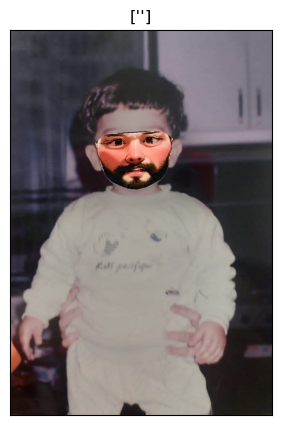

In [121]:
imshow(image= result)

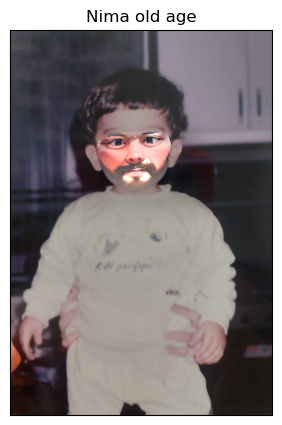

In [123]:
(x, y, w, h) = cv2.boundingRect(convexHullImgNima)
seamless = (int((x+x+w)/2), int((y+y+h)/2))
seamlessClone = cv2.seamlessClone(result, imgNima, img2_head_mask, seamless, cv2.NORMAL_CLONE)
imshow("Nima old age", image= seamlessClone)